# This notebook analyzes FVS benchmark results and produces various graphics

In [6]:
#
# Configure these settings to reflect your local setup
#

DEEP1B_DATASETS= {  \
    "deep1M": { \
        "plottitle": "1M of Deep1B", \
        "queries": { \
            10: "results/benchmarks-%s-q10.csv",\
            100: "results/benchmarks-%s-q100.csv", \
            1000: "results/benchmarks-%s-q1000.csv" \
        } \
    }, \
    "deep2M": { \
        "plottitle": "2M of Deep1B", \
        "queries": { \
            10: "results/benchmarks-%s-q10.csv", \
            100: "results/benchmarks-%s-q100.csv", \
            1000: "results/benchmarks-%s-q1000.csv" \
        } \
    }, \
    "deep5M": {
        "plottitle": "5M of Deep1B",
        "queries": {
            10: "results/benchmarks-%s-q10.csv", \
            100: "results/benchmarks-%s-q100.csv", \
            1000: "results/benchmarks-%s-q1000.csv" \
        } \
    }, \
    "deep10M": {
        "plottitle": "10M of Deep1B",
        "queries": {
            10: "results/benchmarks-%s-q10.csv", \
            100: "results/benchmarks-%s-q100.csv", \
            1000: "results/benchmarks-%s-q1000.csv" \
        } \
    }, \
    "deep20M": {
        "plottitle": "20M of Deep1B",
        "queries": {
            10: "results/benchmarks-%s-q10.csv", \
            100: "results/benchmarks-%s-q100.csv", \
            1000: "results/benchmarks-%s-q1000.csv" \
        } \
    }, \
    "deep50M": {
        "plottitle": "50M of Deep1B",
        "queries": {
            10: "results/benchmarks-%s-q10.csv", \
            100: "results/benchmarks-%s-q100.csv"
        } \
    }, \
    "deep1M-clusters": { \
        "plottitle": "1M of Deep1B (clusters)", \
        "queries": { \
            10: "results/benchmarks-%s-q10-clusters.csv",\
            100: "results/benchmarks-%s-q100-clusters.csv", \
            1000: "results/benchmarks-%s-q1000-clusters.csv" \
        } \
    }, \
    "deep2M-clusters": { \
        "plottitle": "2M of Deep1B (clusters)", \
        "queries": { \
            10: "results/benchmarks-%s-q10-clusters.csv", \
            100: "results/benchmarks-%s-q100-clusters.csv", \
            1000: "results/benchmarks-%s-q1000-clusters.csv" \
        } \
    }, \
    "deep5M-clusters": {
        "plottitle": "5M of Deep1B (clusters)",
        "queries": {
            10: "results/benchmarks-%s-q10-clusters.csv", \
            100: "results/benchmarks-%s-q100-clusters.csv", \
            1000: "results/benchmarks-%s-q1000-clusters.csv" \
        } \
    }, \
    "deep10M-clusters": {
        "plottitle": "10M of Deep1B (clusters)",
        "queries": {
            10: "results/benchmarks-%s-q10-clusters.csv", \
            100: "results/benchmarks-%s-q100-clusters.csv", \
            1000: "results/benchmarks-%s-q1000-clusters.csv" \
        }\
    }\
}

NUM_APUS=4 #TODO: We should get from the allocation_id

MAIN_MEMORY_SIZE = "700G"

In [7]:
#
# Imports
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#
# Load all the CSV files into a master dataframe
#

all_dfs= []

for dset in DEEP1B_DATASETS.keys():
    for num_queries in DEEP1B_DATASETS[dset]["queries"].keys():
        
        dset_for_subst = dset.split("-")[0]
        df = pd.read_csv( DEEP1B_DATASETS[dset]["queries"][num_queries] % dset_for_subst )
        
        df['dset_name'] = dset
        df['num_queries'] = num_queries
        all_dfs.append( df )


df_all = pd.concat( all_dfs )
print(df_all.shape)
print(df_all.columns)
print(df_all['dset_name'].unique())


(435, 14)
Index(['allocationid', 'datasetid', 'dataset_path', 'queries_path', 'bits',
       'ts_start', 'ts_train_start', 'ts_train_end', 'ts_query_start',
       'ts_query_end', 'response', 'recall', 'dset_name', 'num_queries'],
      dtype='object')
['deep1M' 'deep2M' 'deep5M' 'deep10M' 'deep20M' 'deep50M'
 'deep1M-clusters' 'deep2M-clusters' 'deep5M-clusters' 'deep10M-clusters']


In [13]:
#
# Create throughput column
#

df_all['throughput'] = df_all.apply( \
            lambda row: row['num_queries']/row['response'], axis=1 )
    
print(df_all[["dset_name","bits","response","recall", "throughput"]])

           dset_name  bits   response  recall  throughput
0             deep1M   768   0.020478  1.0000  488.334710
1             deep1M   768   0.017423  1.0000  573.953474
2             deep1M   768   0.018164  1.0000  550.533013
3             deep1M   512   0.021775  1.0000  459.249379
4             deep1M   512   0.020864  1.0000  479.303071
..               ...   ...        ...     ...         ...
10  deep10M-clusters   128  10.062235  0.9702   99.381501
11  deep10M-clusters   128  10.664744  0.9702   93.766904
12  deep10M-clusters    64   9.760040  0.8829  102.458594
13  deep10M-clusters    64   9.894829  0.8829  101.062893
14  deep10M-clusters    64   9.207276  0.8829  108.609752

[435 rows x 5 columns]


In [14]:
# 
# Grouping rows by (num_queries,bits) and then average 'recall' and 'throughput'
# 

df_plot = \
    df_all[["dset_name", "num_queries","bits","recall","throughput"]].\
        groupby(["dset_name",'num_queries', 'bits'], as_index=False).mean()
print(df_plot)

           dset_name  num_queries  bits  recall  throughput
0            deep10M           10    64  0.9100  490.984538
1            deep10M           10   128  0.9900  455.636996
2            deep10M           10   256  0.9900  359.225078
3            deep10M           10   512  1.0000  220.929155
4            deep10M           10   768  1.0000  154.387235
..               ...          ...   ...     ...         ...
140  deep5M-clusters         1000    64  0.9160  115.302019
141  deep5M-clusters         1000   128  0.9813  113.418812
142  deep5M-clusters         1000   256  0.9976  103.497418
143  deep5M-clusters         1000   512  0.9994   95.050310
144  deep5M-clusters         1000   768  0.9996   89.397626

[145 rows x 5 columns]


In [15]:
# get min and max error bars for throughput

aggs = df_all[["dset_name", "num_queries","bits","recall","throughput"]].\
        groupby(["dset_name",'num_queries', 'bits'], as_index=False).\
                agg({'throughput': [('min_error', lambda x: x.mean() - x.min()), ('max_error', lambda x: x.max() - x.mean())]})

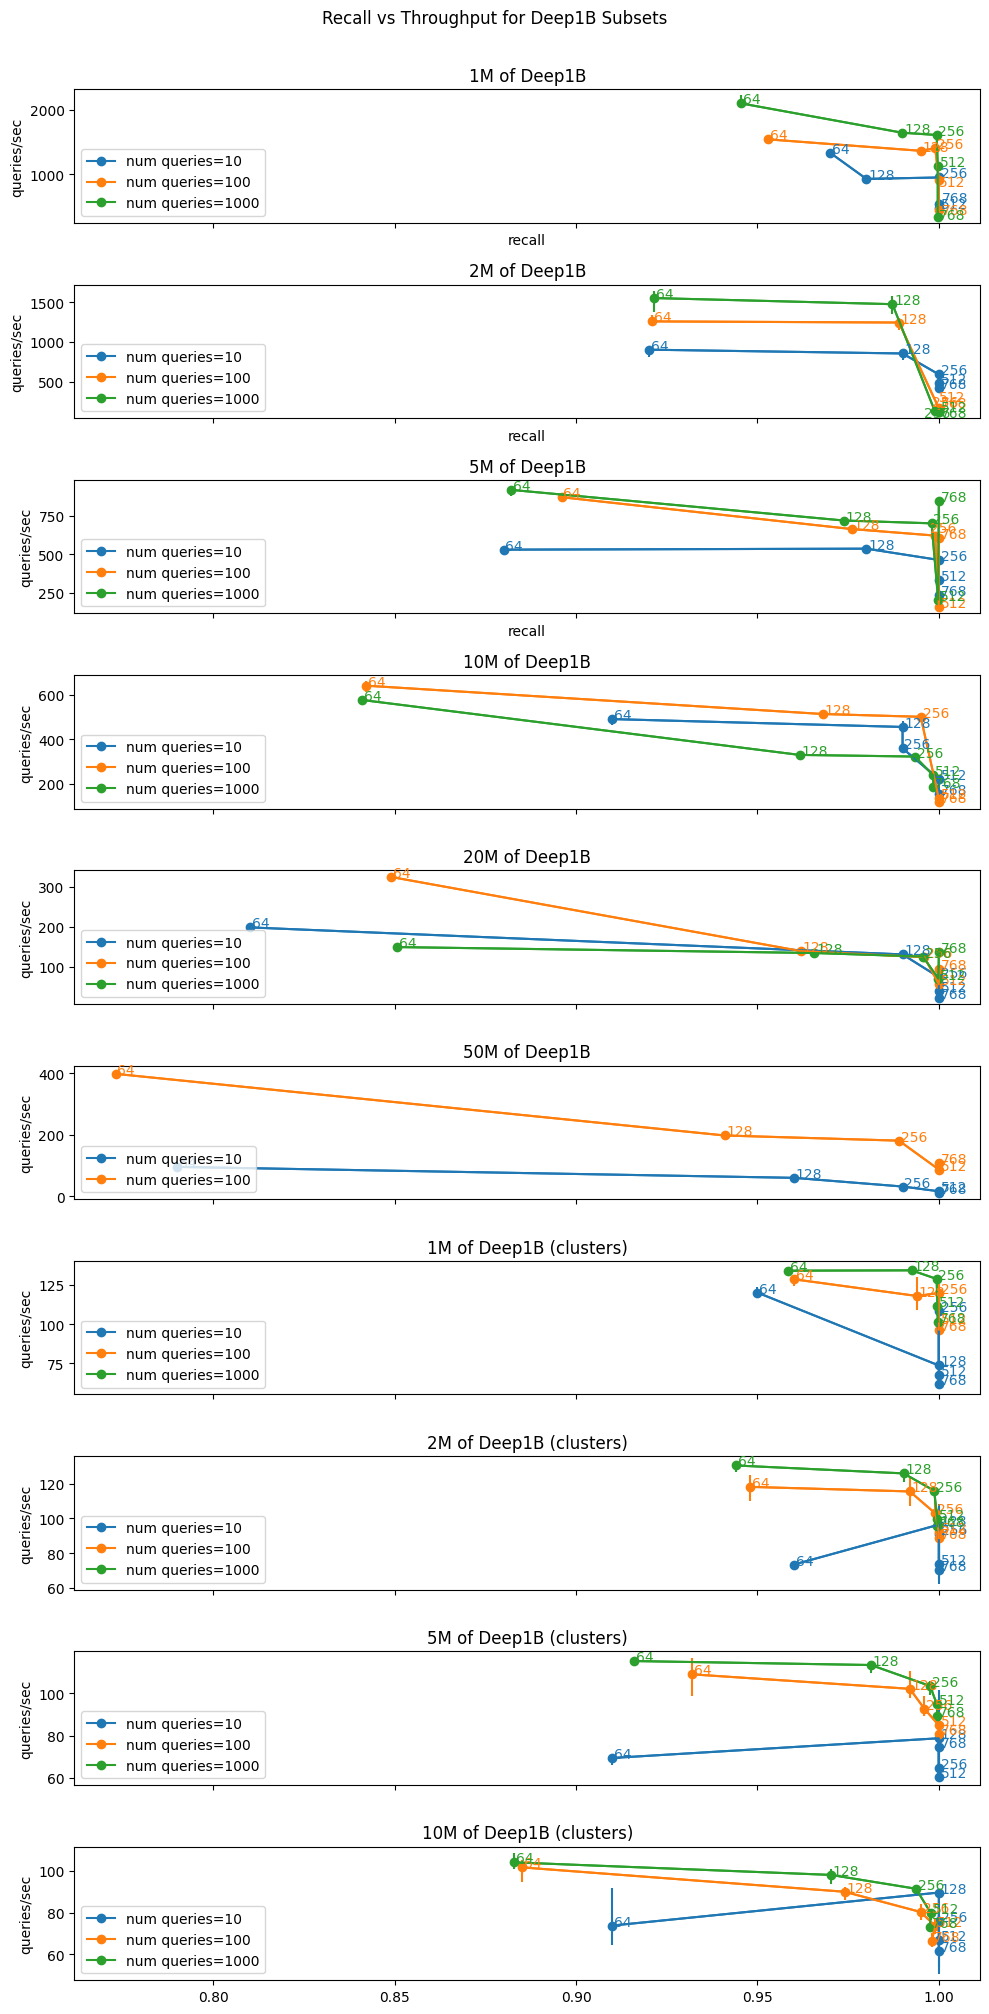

In [16]:
# 
# Plot the data
# 
num_plots = len( DEEP1B_DATASETS.keys() )

fig, axs = plt.subplots(num_plots, sharex=True, figsize=(10,20))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
for d, dset in enumerate(DEEP1B_DATASETS.keys()):
    for q, num_queries in enumerate(DEEP1B_DATASETS[dset]["queries"]):
        y_errormin = aggs.loc[ \
            (aggs['dset_name']==dset) & \
            (aggs['num_queries'] == num_queries)].\
                throughput['min_error']
        y_errormax = aggs.loc[ \
            (aggs['dset_name']==dset) & \
            (aggs['num_queries'] == num_queries)].\
                throughput['max_error']
        y_error = [y_errormin, y_errormax]
        recalls = df_plot.loc[ \
                (df_plot['dset_name']==dset) & \
                (df_plot['num_queries']==num_queries)\
                ]["recall"]
        throughputs = df_plot.loc[ \
                (df_plot['dset_name']==dset) & \
                (df_plot['num_queries']==num_queries)\
                ]["throughput"]
        bits = df_plot.loc[ \
            (df_plot['dset_name']==dset) & \
            (df_plot['num_queries']==num_queries)\
            ]["bits"]
        for i in bits.index: # text for bits, added .0005 for readability
            axs[d].text(recalls[i]+.0005, throughputs[i], bits[i], color=colors[q])
        axs[d].errorbar(recalls, throughputs, yerr=y_error)
        axs[d].plot( recalls, throughputs, '-o',label="num queries=%d" % num_queries, color=colors[q])
        axs[d].set_title( DEEP1B_DATASETS[dset]["plottitle"] )
        axs[d].set_ylabel("queries/sec")
        if d==len(DEEP1B_DATASETS[dset].keys())-1:
            axs[d].set_xlabel("recall")
        axs[d].legend(loc='lower left')

# TODO: fix with a function or package maybe
# 1M
axs[0].texts[4].set_position((1.0007, 575.0)) #blue 768
axs[0].texts[8].set_position((1.0, 813.0)) #orange 512
axs[0].texts[9].set_position((1.0007, 390.0)) #orange 768
axs[0].texts[14].set_position((1.0, 300.0)) #green 768
# 2M
axs[1].texts[7].set_position((0.998, 200.0)) #orage 256
axs[1].texts[8].set_position((0.99995, 259)) #orage 512
axs[1].texts[9].set_position((1.0006, 180.0)) #orange 765
axs[1].texts[12].set_position((0.996, 50.0)) #green 256
axs[1].texts[13].set_position((1.0006, 125.0)) #green 512
axs[1].texts[14].set_position((1.0005, 50.0)) #green 768
# 5M
axs[2].texts[7].set_position((0.9975, 645.0))

axs[0].set_xlabel("recall")
axs[1].set_xlabel("recall")
axs[2].set_xlabel("recall")
plt.suptitle("Recall vs Throughput for Deep1B Subsets",y=1.005)
plt.tight_layout()
plt.savefig("results/gemini_fvs_deep1B.png")